In [1]:
using CategoricalArrays

function load_dataset(Y_name)
    # Loading and preprocessing
    forest_fires = CSV.read("../data/forestfires.csv", DataFrame)
    forest_fires.month = levelcode.(CategoricalArray(forest_fires.month))
    forest_fires.day = levelcode.(CategoricalArray(forest_fires.day))
    forest_fires = mapcols(col -> Float32.(col), forest_fires)

    # Getting X and Y
    X = select(forest_fires, Not(Y_name))
    Y = select(forest_fires, Y_name)
    return Matrix(X)', Matrix(Y)'
end

load_dataset (generic function with 1 method)

In [2]:
using Mlyn

function get_model()
    return create_model(regression, [
        BlueprintLinear(12, 5, method_xavier_normal),
        BlueprintBatchNorm1D(n_features=5),
        BlueprintActivation(method_sigmoid),
        
        BlueprintLinear(5, 3, method_xavier_normal),
        BlueprintBatchNorm1D(n_features=3),
        BlueprintActivation(method_sigmoid),

        BlueprintLinear(3, 1, method_xavier_normal),
        BlueprintBatchNorm1D(n_features=1),
        BlueprintActivation(method_sigmoid)
    ])
end

get_model (generic function with 1 method)

In [3]:
using Mlyn, CSV, DataFrames

X, Y = load_dataset(:rain)
X_train, Y_train, X_test, Y_test = train_test_split(X, Y, 0.8)

(Float32[6.0 4.0 … 1.0 2.0; 5.0 5.0 … 2.0 4.0; … ; 0.9 3.1 … 8.0 7.6; 2.29 0.0 … 0.0 0.0], Float32[0.0 0.0 … 0.0 0.0], Float32[8.0 4.0 … 6.0 8.0; 6.0 5.0 … 4.0 6.0; … ; 2.7 5.4 … 3.1 4.5; 0.0 1.75 … 28.74 2.18], Float32[0.0 0.0 … 0.0 0.0])

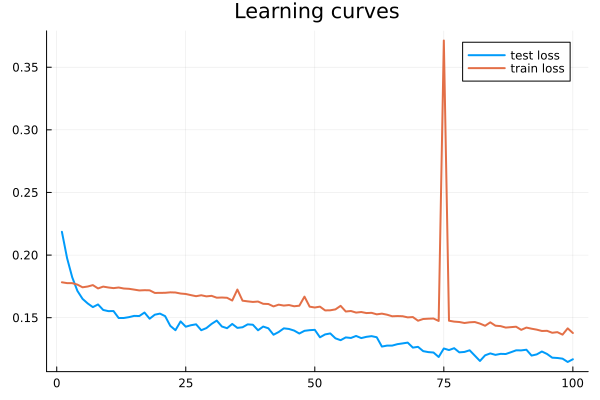

In [4]:
model = get_model()
optimizer = OptimizerSGD(learning_rate=0.01)
history = train!(model, optimizer, 100, X_train, Y_train, X_test, Y_test; batch_size=100, logging=false)
history_plot(history)

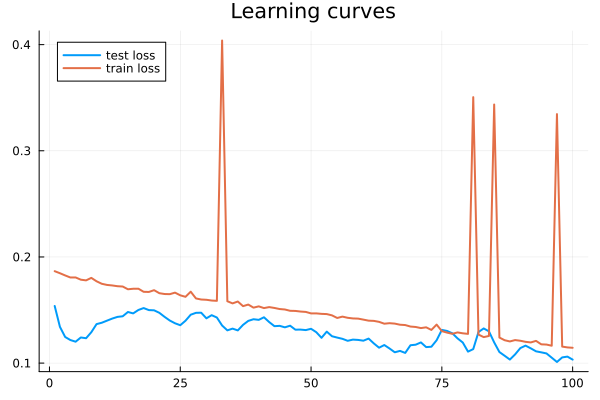

In [5]:
model = get_model()
optimizer = OptimizerAdam()
init_adam!(optimizer, model.layers)
history = train!(model, optimizer, 100, X_train, Y_train, X_test, Y_test; batch_size=100, logging=false)
history_plot(history)

In [6]:
X, Y = load_dataset(:area)
X_train, Y_train, X_test, Y_test = train_test_split(X, Y, 0.8)

(Float32[1.0 4.0 … 8.0 9.0; 4.0 3.0 … 6.0 9.0; … ; 4.0 4.0 … 2.7 3.1; 0.0 0.0 … 0.0 0.0], Float32[7.21 7.36 … 0.0 0.0], Float32[2.0 2.0 … 2.0 6.0; 2.0 4.0 … 4.0 3.0; … ; 3.1 1.8 … 1.8 4.0; 0.0 0.0 … 0.0 0.0], Float32[0.52 1.47 … 0.0 0.0])

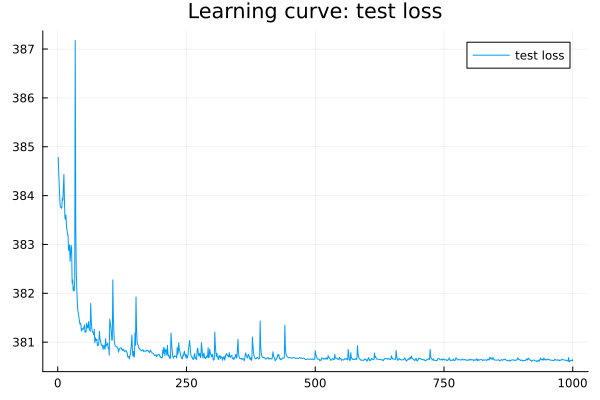

In [16]:
model = get_model()
optimizer = OptimizerSGD(learning_rate=0.01)
history = train!(model, optimizer, 1000, X_train, Y_train, X_test, Y_test; batch_size=100, logging = false)
history_plot_test_loss(history)

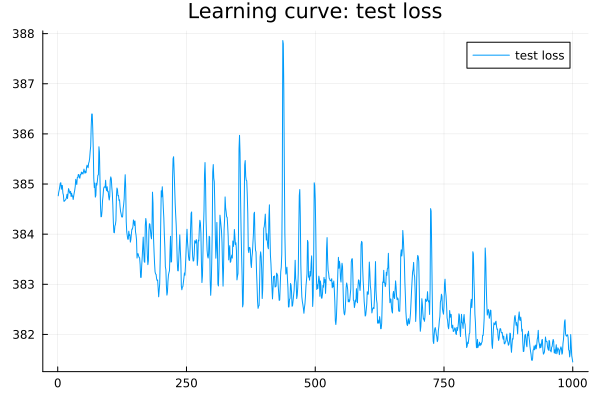

In [15]:
model = get_model()
optimizer = OptimizerAdam()
init_adam!(optimizer, model.layers)
history = train!(model, optimizer, 1000, X_train, Y_train, X_test, Y_test; batch_size=100, logging = false)
history_plot_test_loss(history)